In [327]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression , Ridge, ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor, VotingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
import lightgbm as lgb

In [189]:
train = pd.read_csv("C:\\Users\\akank\\OneDrive - University of Cincinnati\\Practice\\Machine Learning\\House Price\\train.csv")

In [356]:
test =  pd.read_csv("C:\\Users\\akank\\OneDrive - University of Cincinnati\\Practice\\Machine Learning\\House Price\\test.csv")

In [190]:
train=train.copy()

In [18]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [19]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [24]:
train.dtypes[train.dtypes!='object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [25]:
train.dtypes[train.dtypes=='object']

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

### Treating Null Values

In [37]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

# Display missing data for train and test datasets
train_missing = missing_data(train)
test_missing = missing_data(test)

print("Missing Data in Train Dataset:")
print(train_missing[train_missing['Total'] > 0])  # Filter to show only columns with missing values

print("\nMissing Data in Test Dataset:")
print(test_missing[test_missing['Total'] > 0])  # Filter to show only columns with missing values


Missing Data in Train Dataset:
              Total    Percent
PoolQC         1453  99.520548
MiscFeature    1406  96.301370
Alley          1369  93.767123
Fence          1179  80.753425
MasVnrType      872  59.726027
FireplaceQu     690  47.260274
LotFrontage     259  17.739726
GarageYrBlt      81   5.547945
GarageCond       81   5.547945
GarageType       81   5.547945
GarageFinish     81   5.547945
GarageQual       81   5.547945
BsmtFinType2     38   2.602740
BsmtExposure     38   2.602740
BsmtQual         37   2.534247
BsmtCond         37   2.534247
BsmtFinType1     37   2.534247
MasVnrArea        8   0.547945
Electrical        1   0.068493

Missing Data in Test Dataset:
              Total    Percent
PoolQC         1456  99.794380
MiscFeature    1408  96.504455
Alley          1352  92.666210
Fence          1169  80.123372
MasVnrType      894  61.274846
FireplaceQu     730  50.034270
LotFrontage     227  15.558602
GarageYrBlt      78   5.346127
GarageQual       78   5.346127
GarageFi

#### we will be dropping column which has more than 80% of null values 
##### PoolQC, MiscFeature, Alley, Fence columns has more than 80% null values. hence dropping these columns.

In [191]:
to_drop = train_missing[train_missing['Percent'] > 80].index
train = train.drop(columns=to_drop)

### Removing outliers by exploring numerical values

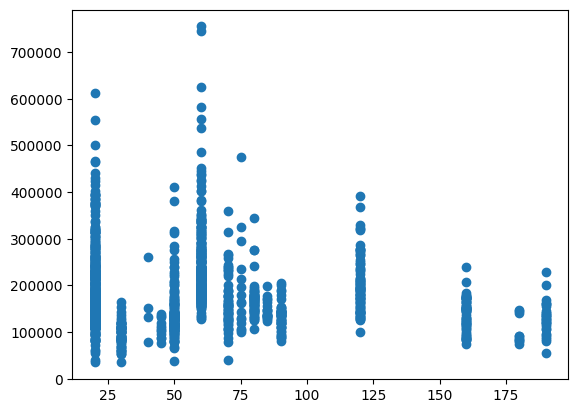

In [39]:
plt.scatter(x='MSSubClass', y='SalePrice',data=train)

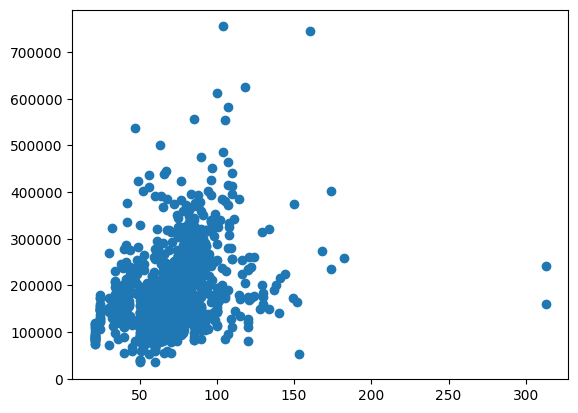

In [40]:
plt.scatter(x='LotFrontage', y='SalePrice',data=train)

In [43]:
train.query('LotFrontage>300')

# drop id 934 and 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,IR2,HLS,AllPub,Inside,...,0,0,0,0,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,0,0,480,0,1,2008,New,Partial,160000


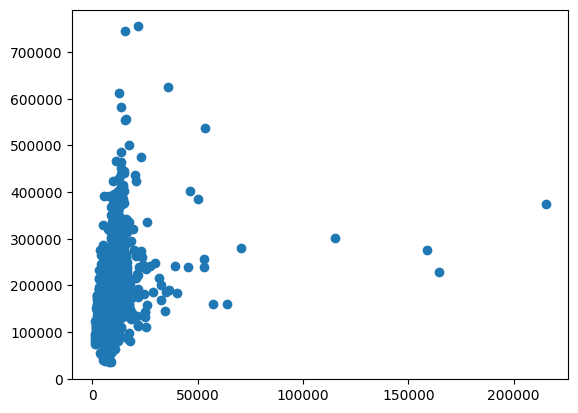

In [44]:
plt.scatter(x='LotArea', y='SalePrice',data=train)

In [45]:
train.query('LotArea>55000')

# drop id 250, 707, 314, and 336 (too much big number for lotarea)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,IR2,Low,AllPub,CulDSac,...,0,0,0,0,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,IR3,Low,AllPub,Inside,...,0,0,0,0,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,IR1,HLS,AllPub,Corner,...,0,0,0,0,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,IR1,Low,AllPub,Inside,...,0,0,0,0,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,IR2,Low,AllPub,CulDSac,...,0,0,0,0,0,6,2007,WD,Normal,302000
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,0,0,480,0,1,2008,New,Partial,160000
1396,1397,20,RL,NaN,57200,Pave,IR1,Bnk,AllPub,Inside,...,50,0,0,0,0,6,2010,WD,Normal,160000


In [50]:
#### let's check z score to get more clarity about outliers

stats.zscore(train['LotArea']).sort_values().tail()

451     6.037793
706    10.486449
249    14.881285
335    15.448542
313    20.518273
Name: LotArea, dtype: float64

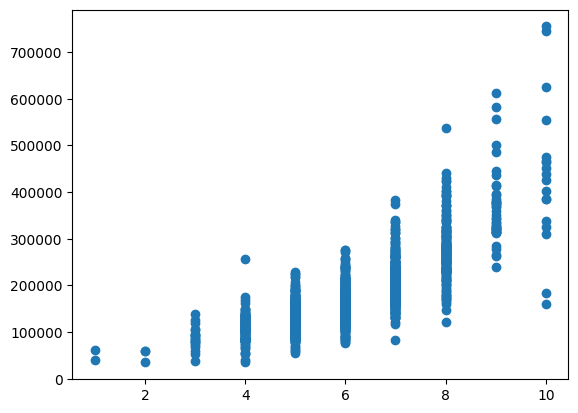

In [51]:
plt.scatter(x='OverallQual', y='SalePrice',data=train)

In [52]:
train.query('OverallQual==10')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,IR2,HLS,AllPub,CulDSac,...,37,0,0,0,0,10,2006,New,Partial,438780
185,186,75,RM,90.0,22950,Pave,IR2,Lvl,AllPub,Inside,...,0,0,410,0,0,6,2006,WD,Normal,475000
224,225,20,RL,103.0,13472,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2009,WD,Normal,386250
389,390,60,RL,96.0,12474,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2008,New,Partial,426000
440,441,20,RL,105.0,15431,Pave,Reg,Lvl,AllPub,Inside,...,0,0,170,0,0,4,2009,WD,Normal,555000
515,516,20,RL,94.0,12220,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2009,New,Partial,402861
523,524,60,RL,130.0,40094,Pave,IR1,Bnk,AllPub,Inside,...,0,0,0,0,0,10,2007,New,Partial,184750
583,584,75,RM,75.0,13500,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2008,WD,Normal,325000
591,592,60,RL,97.0,13478,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,6,2009,ConLI,Normal,451950
691,692,60,RL,104.0,21535,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2007,WD,Normal,755000


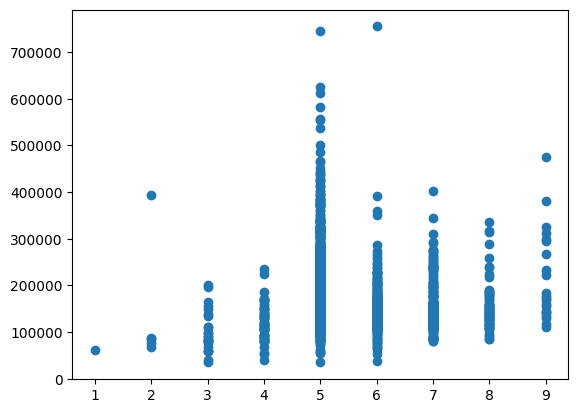

In [53]:
plt.scatter(x='OverallCond', y='SalePrice',data=train)

In [59]:
# we should remove values who are very different from their category, like in 2 we can see one data point.

train.query('OverallCond==2 & SalePrice>300000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
378,379,20,RL,88.0,11394,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,6,2010,New,Partial,394432


In [58]:
train.query('OverallCond==6 & SalePrice>700000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2007,WD,Normal,755000


In [ ]:
## remove 692, 379

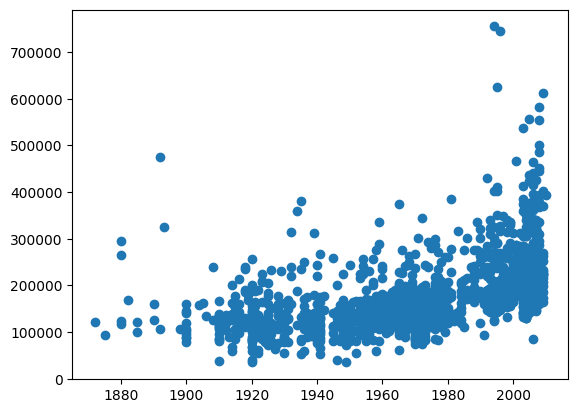

In [60]:

plt.scatter(x='YearBuilt', y='SalePrice',data=train)

In [62]:
train.query('YearBuilt < 1900 & SalePrice>400000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,IR2,Lvl,AllPub,Inside,...,0,0,410,0,0,6,2006,WD,Normal,475000


In [63]:
train.query('YearBuilt > 1980 & SalePrice>700000')

# remove 692,1183,186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,555,0,7,2007,WD,Abnorml,745000


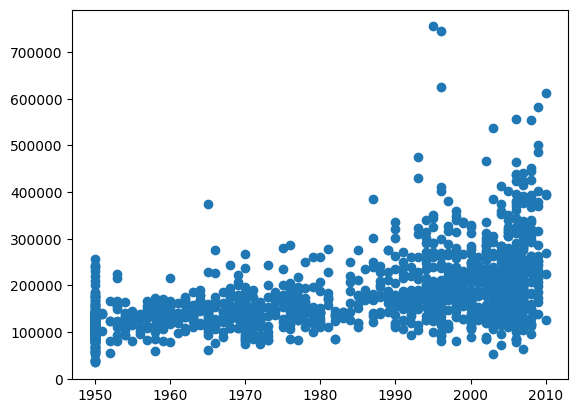

In [65]:
plt.scatter(x='YearRemodAdd', y='SalePrice',data=train)

In [66]:
train.query('YearRemodAdd < 1970 & SalePrice>300000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,IR3,Low,AllPub,Inside,...,0,0,0,0,0,6,2009,WD,Normal,375000


In [67]:
train.query('YearRemodAdd > 1990 & SalePrice>700000')

# remove 692,1183,314

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,555,0,7,2007,WD,Abnorml,745000


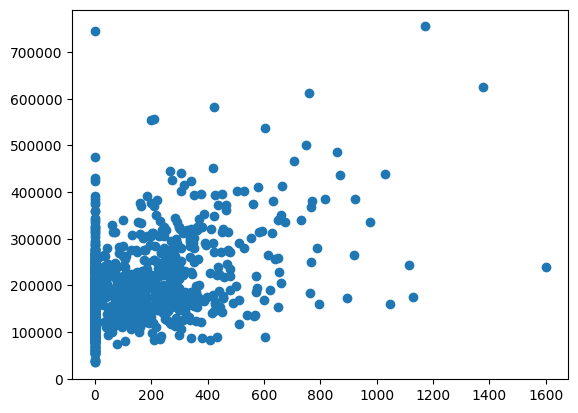

In [70]:
plt.scatter(x='MasVnrArea', y='SalePrice',data=train)

In [71]:
train.query('MasVnrArea>1500')

# remove 298

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,IR1,Lvl,AllPub,Inside,...,0,0,198,0,0,6,2007,WD,Normal,239000


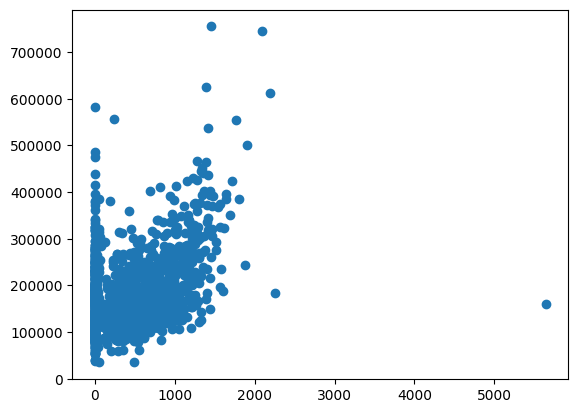

In [73]:
plt.scatter(x='BsmtFinSF1', y='SalePrice',data=train)

In [74]:
train.query('BsmtFinSF1>5000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,0,0,480,0,1,2008,New,Partial,160000


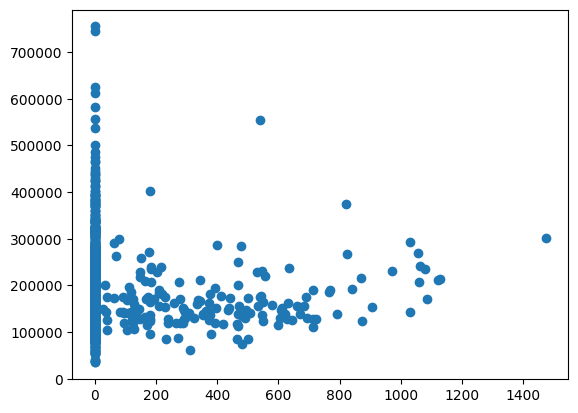

In [75]:
plt.scatter(x='BsmtFinSF2', y='SalePrice',data=train)

In [76]:
train.query('BsmtFinSF2>400 & SalePrice>500000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
440,441,20,RL,105.0,15431,Pave,Reg,Lvl,AllPub,Inside,...,0,0,170,0,0,4,2009,WD,Normal,555000


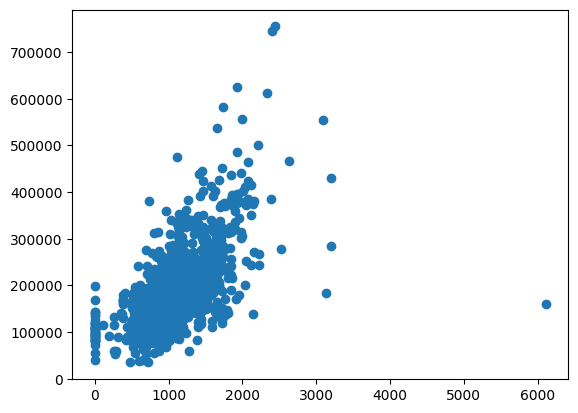

In [78]:
plt.scatter(x='TotalBsmtSF', y='SalePrice',data=train)

In [79]:
train.query('TotalBsmtSF>5000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,0,0,480,0,1,2008,New,Partial,160000


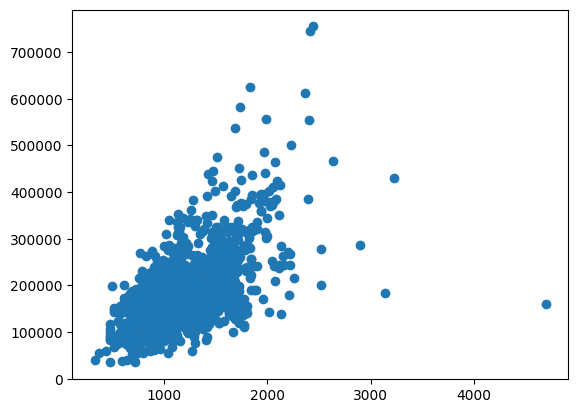

In [80]:
plt.scatter(x='1stFlrSF', y='SalePrice',data=train)

In [82]:
train.query('`1stFlrSF`>4000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,0,0,480,0,1,2008,New,Partial,160000


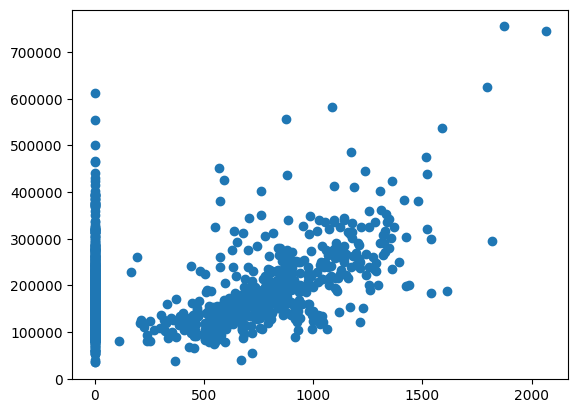

In [84]:
plt.scatter(x='2ndFlrSF', y='SalePrice',data=train)

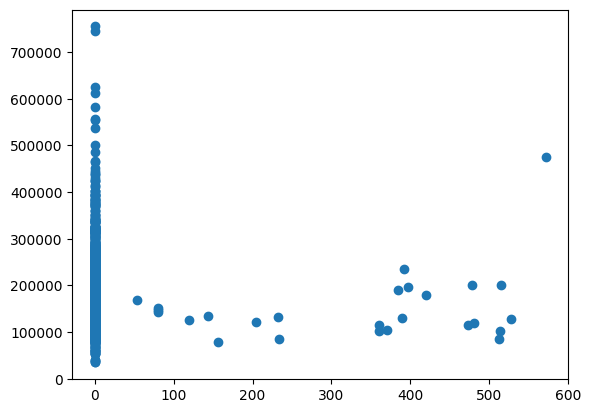

In [85]:
plt.scatter(x='LowQualFinSF', y='SalePrice',data=train)

In [86]:
train.query('LowQualFinSF>550')

# 186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,IR2,Lvl,AllPub,Inside,...,0,0,410,0,0,6,2006,WD,Normal,475000


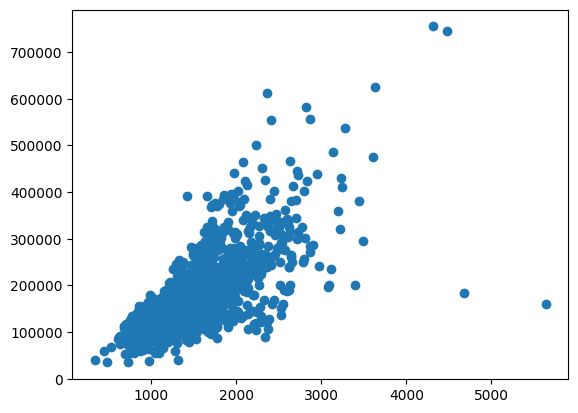

In [87]:
plt.scatter(x='GrLivArea', y='SalePrice',data=train)

In [89]:
train.query('GrLivArea>4500')

# 524,1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,IR1,Bnk,AllPub,Inside,...,0,0,0,0,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,0,0,480,0,1,2008,New,Partial,160000


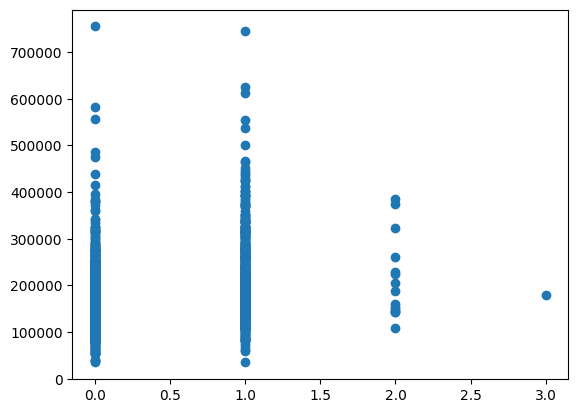

In [90]:
plt.scatter(x='BsmtFullBath', y='SalePrice',data=train)

In [92]:
train.query('BsmtFullBath==3.0')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,739,90,RL,60.0,10800,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2009,WD,Alloca,179000


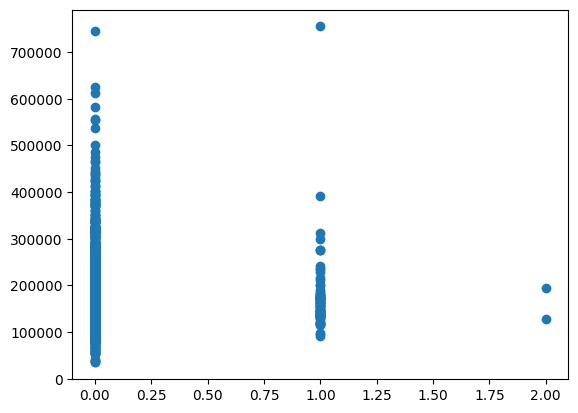

In [93]:
plt.scatter(x='BsmtHalfBath', y='SalePrice',data=train)

In [94]:
train.query('BsmtHalfBath==1.0 & SalePrice>500000')

#692

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2007,WD,Normal,755000


In [96]:
stats.zscore(train['BsmtHalfBath']).unique()

array([-0.24106104,  3.94880935,  8.13867973])

In [97]:
# 8.13 z sscore is very high hence dropping data points for BsmtHalfBath = 2.0

train.query('BsmtHalfBath==2.0')
# 598 and 955

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
597,598,120,RL,53.0,3922,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2007,New,Partial,194201
954,955,90,RL,35.0,9400,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,10,2006,WD,AdjLand,127500


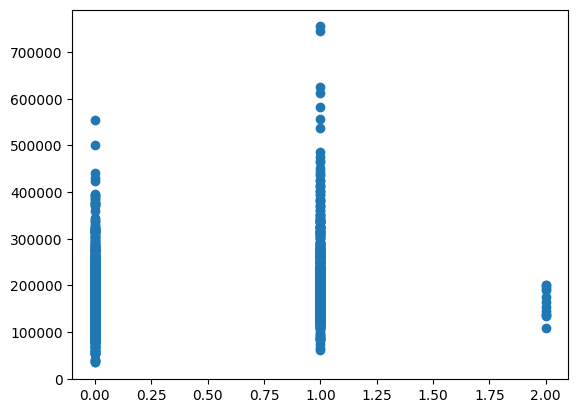

In [98]:
plt.scatter(x='HalfBath', y='SalePrice',data=train)

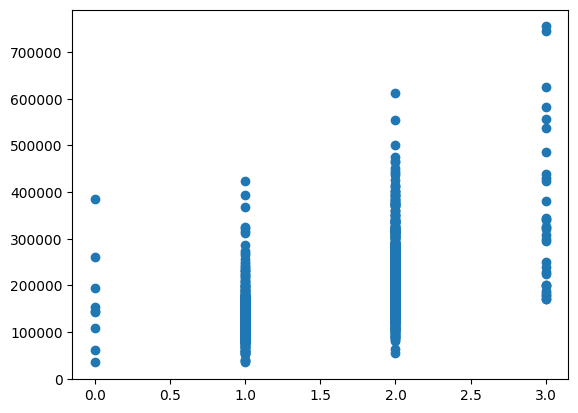

In [99]:
plt.scatter(x='FullBath', y='SalePrice',data=train)

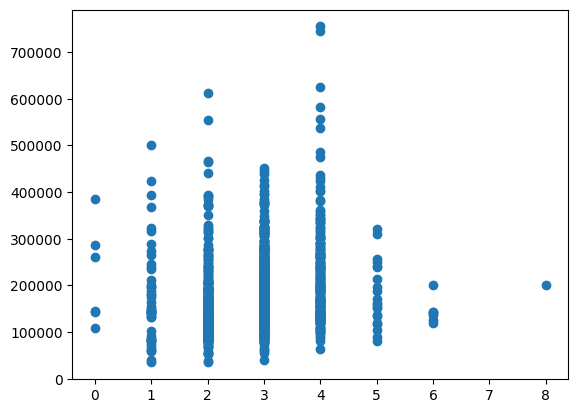

In [101]:
plt.scatter(x='BedroomAbvGr', y='SalePrice',data=train)

In [102]:
train.query('BedroomAbvGr==8.0')

#636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Reg,Bnk,AllPub,Inside,...,0,0,0,0,0,3,2007,WD,Abnorml,200000


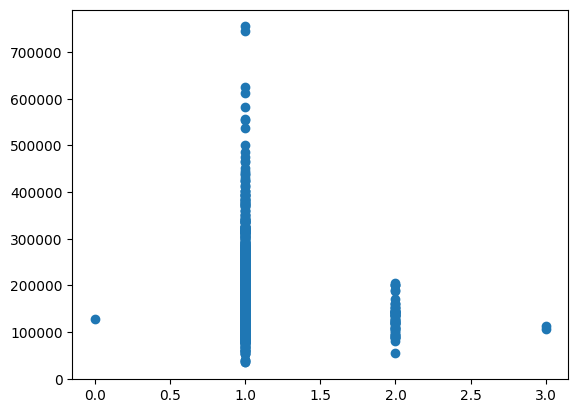

In [103]:
plt.scatter(x='KitchenAbvGr', y='SalePrice',data=train)

In [105]:
train.query('KitchenAbvGr==3.0')


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,Reg,Lvl,AllPub,Inside,...,102,0,0,0,0,6,2009,New,Partial,113000
809,810,75,RM,90.0,8100,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,11,2009,WD,Normal,106000


In [130]:
stats.zscore(train['KitchenAbvGr']).unique()

array([-0.21145358,  4.32857919,  8.86861196, -4.75148635])

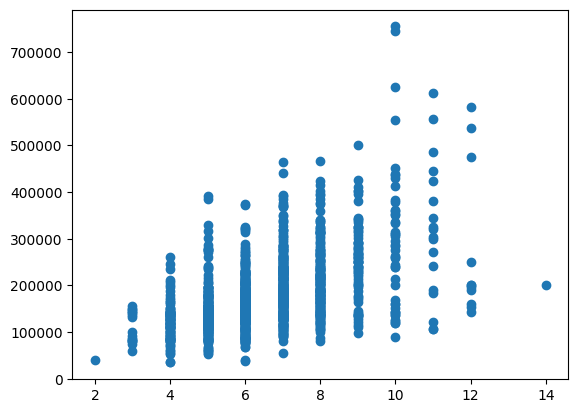

In [108]:
plt.scatter(x='TotRmsAbvGrd', y='SalePrice',data=train)

In [109]:
train.query('TotRmsAbvGrd==14')

#636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Reg,Bnk,AllPub,Inside,...,0,0,0,0,0,3,2007,WD,Abnorml,200000


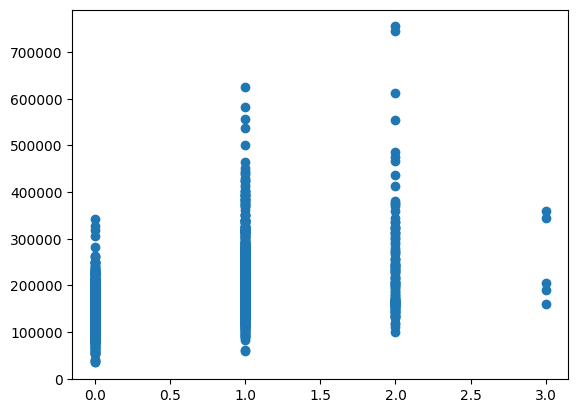

In [111]:
plt.scatter(x='Fireplaces', y='SalePrice',data=train)

In [112]:
train.query('Fireplaces==3.0')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
166,167,20,RL,NaN,10708,Pave,IR1,Lvl,AllPub,Inside,...,0,0,142,0,0,11,2009,COD,Normal,190000
309,310,20,RL,90.0,12378,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,11,2006,WD,Normal,360000
605,606,60,RL,85.0,13600,Pave,Reg,Lvl,AllPub,Inside,...,0,0,189,0,0,10,2009,WD,Normal,205000
642,643,80,RL,75.0,13860,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2009,WD,Normal,345000
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,0,0,480,0,1,2008,New,Partial,160000


In [113]:
stats.zscore(train['Fireplaces']).unique()

# we shouldn't drop above 5 as zscore is near 3

array([-0.95122649,  0.60049493,  2.15221636,  3.70393778])

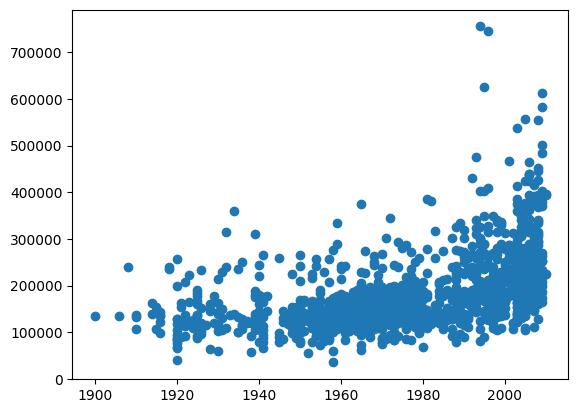

In [115]:
plt.scatter(x='GarageYrBlt', y='SalePrice',data=train)

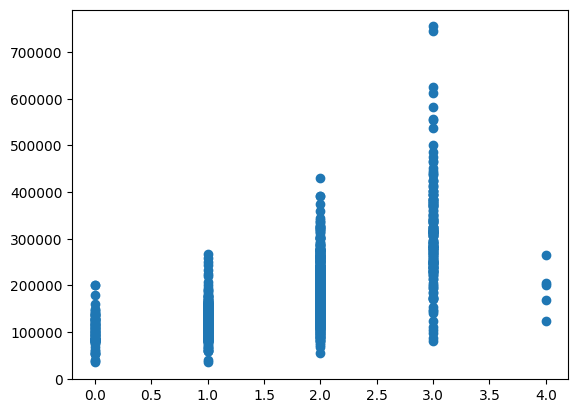

In [116]:
plt.scatter(x='GarageCars', y='SalePrice',data=train)

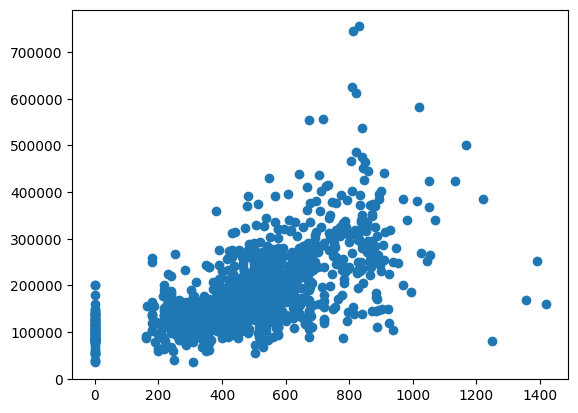

In [117]:
plt.scatter(x='GarageArea', y='SalePrice',data=train)

In [121]:
train.query('GarageArea>1220')

# 582,1062,1191

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2009,New,Partial,253293
1061,1062,30,C (all),120.0,18000,Grvl,Reg,Low,AllPub,Inside,...,0,0,0,0,560,8,2008,ConLD,Normal,81000
1190,1191,190,RL,NaN,32463,Pave,Reg,Low,AllPub,Inside,...,0,0,0,0,0,3,2007,WD,Normal,168000
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,0,0,480,0,1,2008,New,Partial,160000


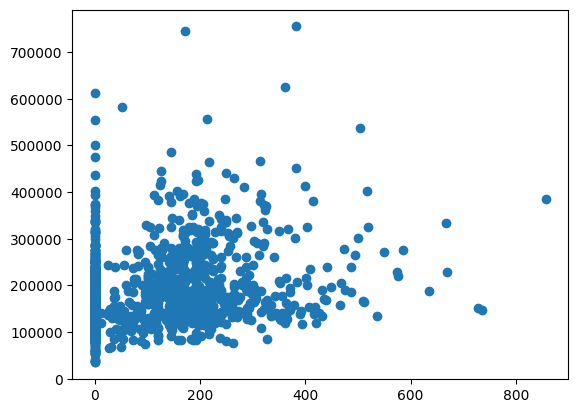

In [123]:
plt.scatter(x='WoodDeckSF', y='SalePrice',data=train)

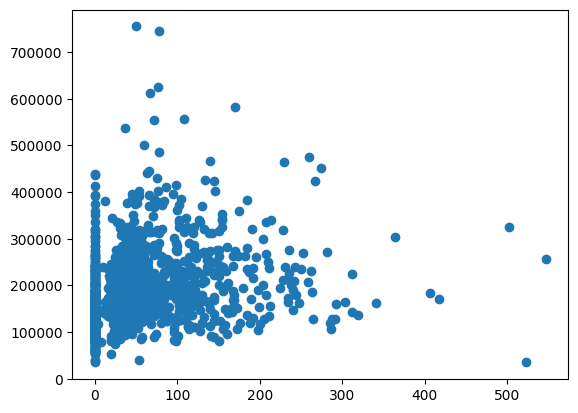

In [124]:
plt.scatter(x='OpenPorchSF', y='SalePrice',data=train)

In [125]:
train.query('OpenPorchSF>500 & SalePrice<100000')

#496

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,Reg,Lvl,AllPub,Inside,...,115,0,0,0,0,11,2009,WD,Abnorml,34900


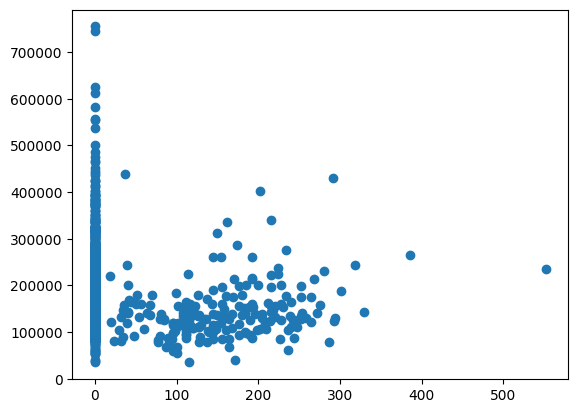

In [128]:
plt.scatter(x='EnclosedPorch', y='SalePrice',data=train)

In [129]:
train.query('EnclosedPorch>500')

#198

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,Reg,Lvl,AllPub,Corner,...,552,0,0,512,0,3,2006,WD,Abnorml,235000


In [192]:
values = [935,1299, 250, 707, 314, 336, 379, 692, 1183, 186, 314, 298, 524, 739, 598, 955, 636, 582, 1062, 1191, 496, 198, 441, 49,810]

In [193]:
train = train[train.Id.isin(values)==False]

### Exploring categorical columns to select only impactful columns for modelling 

In [134]:
train['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [194]:
train['MasVnrType'].fillna('No', inplace=True)


In [357]:
test['MasVnrType'].fillna('No', inplace=True)

C:\Users\akank\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


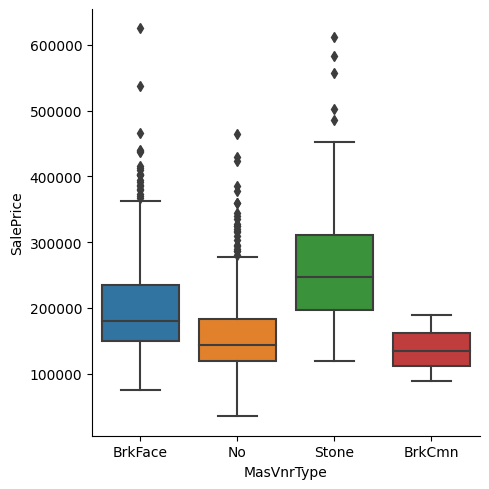

In [195]:
sns.catplot(data=train, x='MasVnrType', y='SalePrice', kind='box')

In [ ]:
### all the categories showing different behaviour, hence we can utilize this column in modelling

In [196]:
train['MasVnrArea'].fillna(0, inplace=True)


In [358]:
test['MasVnrArea'].fillna(0, inplace=True)

In [197]:
train['FireplaceQu'].fillna('No', inplace=True)


In [359]:
test['FireplaceQu'].fillna('No', inplace=True)

C:\Users\akank\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


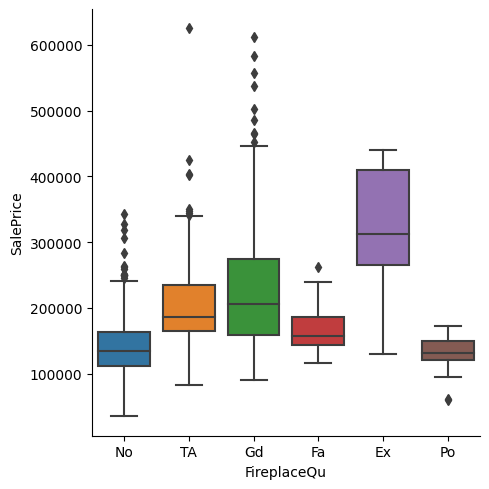

In [153]:
sns.catplot(data=train, x='FireplaceQu', y='SalePrice', kind='box')

C:\Users\akank\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


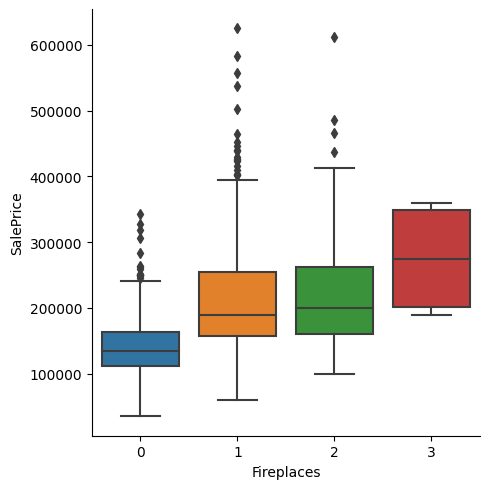

In [154]:
sns.catplot(data=train, x='Fireplaces', y='SalePrice', kind='box')

In [198]:
train['LotFrontage'].fillna(0, inplace=True)


In [360]:
test['LotFrontage'].fillna(0, inplace=True)

In [158]:
train['GarageYrBlt'].corr(train['YearBuilt'])

0.8278378551228028

In [160]:
# we can drop garage bilt year as it is not a very important variable.
# it has good correlation with yearbuilt 
# we are taking year bulit so we can ignore garage built year.

In [161]:
train['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [199]:
train['GarageCond'].fillna('No', inplace=True)


In [361]:
test['GarageCond'].fillna('No', inplace=True)

C:\Users\akank\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


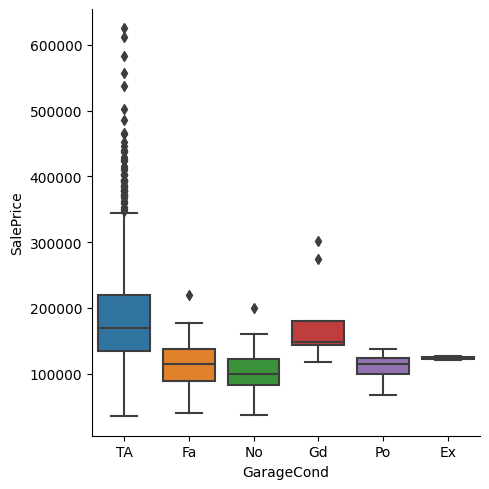

In [163]:
sns.catplot(data=train, x='GarageCond', y='SalePrice', kind='box')

In [164]:
train['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [200]:
train['GarageType'].fillna('No', inplace=True)


In [362]:
test['GarageType'].fillna('No', inplace=True)

C:\Users\akank\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


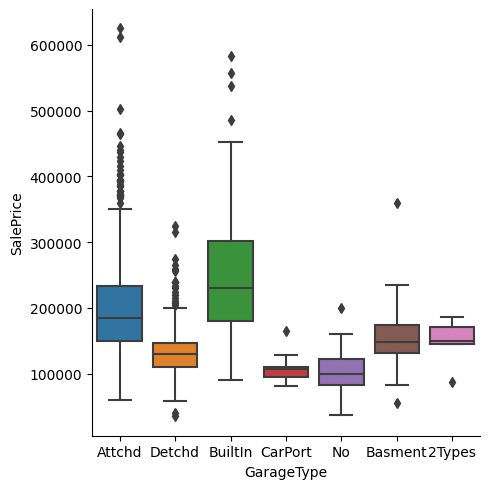

In [166]:
sns.catplot(data=train, x='GarageType', y='SalePrice', kind='box')

In [167]:
train['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Po', 'Ex'], dtype=object)

In [201]:
train['GarageQual'].fillna('No', inplace=True)


In [363]:
test['GarageQual'].fillna('No', inplace=True)

C:\Users\akank\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


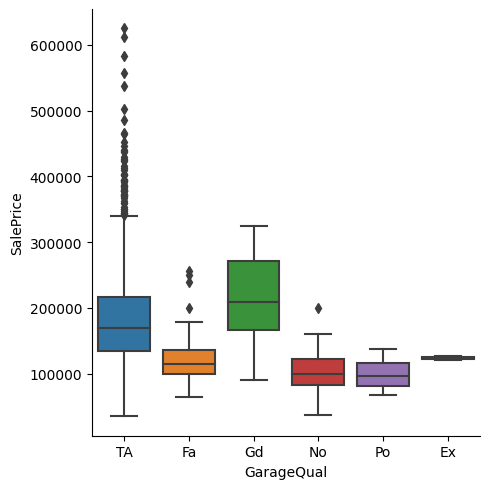

In [171]:
sns.catplot(data=train, x='GarageQual', y='SalePrice', kind='box')

In [202]:
train['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [203]:
train['BsmtFinType2'].fillna('No', inplace=True)


In [364]:
test['BsmtFinType2'].fillna('No', inplace=True)

C:\Users\akank\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


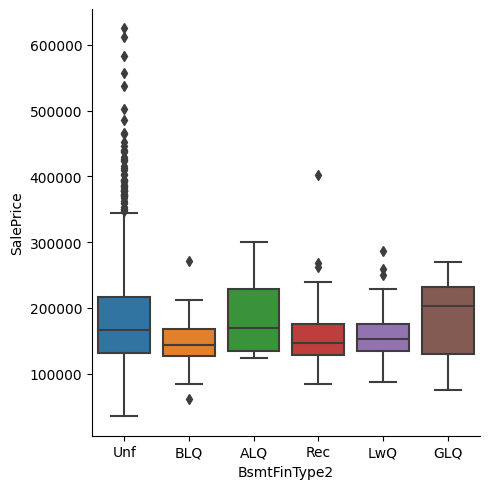

In [174]:
sns.catplot(data=train, x='BsmtFinType2', y='SalePrice', kind='box')

In [204]:
train['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [205]:
train['BsmtExposure'].fillna('NoExp', inplace=True)


In [365]:
test['BsmtExposure'].fillna('NoExp', inplace=True)

C:\Users\akank\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


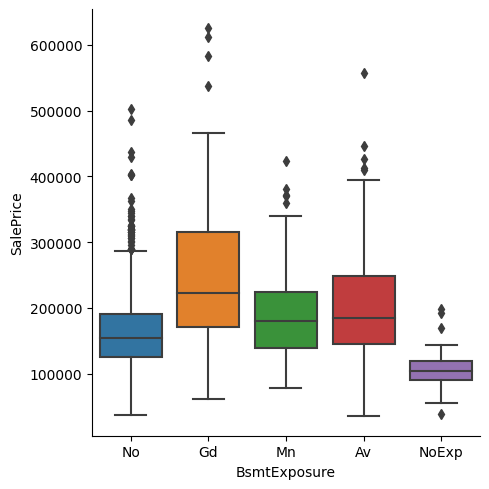

In [206]:
sns.catplot(data=train, x='BsmtExposure', y='SalePrice', kind='box')

In [207]:
train['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [208]:
train['BsmtQual'].fillna('No', inplace=True)


In [366]:
test['BsmtQual'].fillna('No', inplace=True)

C:\Users\akank\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


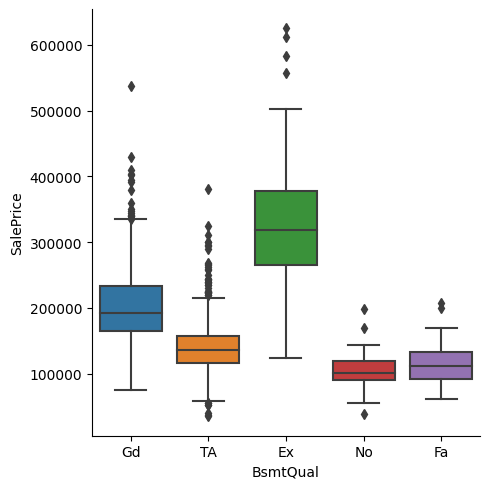

In [209]:
sns.catplot(data=train, x='BsmtQual', y='SalePrice', kind='box')

In [211]:
train['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [212]:
train['BsmtCond'].fillna('No', inplace=True)


In [367]:
test['BsmtCond'].fillna('No', inplace=True)

C:\Users\akank\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


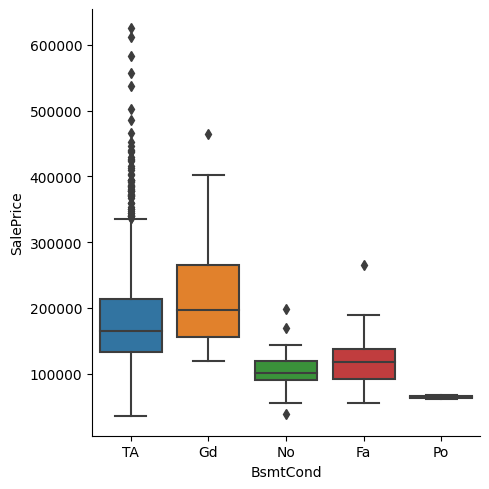

In [213]:
sns.catplot(data=train, x='BsmtCond', y='SalePrice', kind='box')

In [214]:
train['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [215]:
train['MasVnrArea'].fillna(0, inplace=True)


In [368]:
test['MasVnrArea'].fillna(0, inplace=True)

In [216]:
train['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [217]:
train['Electrical'].fillna('SBrkr', inplace=True)


In [369]:
test['Electrical'].fillna('SBrkr', inplace=True)

In [ ]:
#We can drop those column which categories are not significantly different from each other
#Or those columns which has high correlation with more important columns

In [222]:
train=train.drop(columns=['GarageYrBlt','GarageCond','BsmtFinType2'])


In [370]:
test=test.drop(columns=['MiscFeature','Alley','Fence','PoolQC','GarageYrBlt','GarageCond','BsmtFinType2'])

## Feature Engineering

In [230]:
train['houseage'] = train['YrSold'] - train['YearBuilt']


In [371]:
test['houseage'] = test['YrSold'] - test['YearBuilt']

In [231]:
train['houseremodelage'] = train['YrSold'] - train['YearRemodAdd']


In [372]:
test['houseremodelage'] = test['YrSold'] - test['YearRemodAdd']

In [232]:
train['totalsf'] = train['1stFlrSF'] + train['2ndFlrSF'] + train['BsmtFinSF1'] + train['BsmtFinSF2']


In [373]:
test['totalsf'] = test['1stFlrSF'] + test['2ndFlrSF'] + test['BsmtFinSF1'] + test['BsmtFinSF2']

In [233]:
train['totalarea'] = train['GrLivArea'] + train['TotalBsmtSF']


In [374]:
test['totalarea'] = test['GrLivArea'] + test['TotalBsmtSF']

In [234]:
train['totalbaths'] = train['BsmtFullBath'] + train['FullBath'] + 0.5 * (train['BsmtHalfBath'] + train['HalfBath'])


In [375]:
test['totalbaths'] = test['BsmtFullBath'] + test['FullBath'] + 0.5 * (test['BsmtHalfBath'] + test['HalfBath'])

In [236]:
train['totalporchsf'] = train['OpenPorchSF'] + train['3SsnPorch'] + train['EnclosedPorch'] + train['ScreenPorch']


In [376]:
test['totalporchsf'] = test['OpenPorchSF'] + test['3SsnPorch'] + test['EnclosedPorch'] + test['ScreenPorch']

In [237]:
train = train.drop(columns=['Id','YrSold','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2',
                            'GrLivArea', 'TotalBsmtSF', 'BsmtFullBath', 'FullBath' , 'BsmtHalfBath', 'HalfBath',
                           'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch'])


In [377]:
test = test.drop(columns=['YrSold','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2',
                            'GrLivArea', 'TotalBsmtSF', 'BsmtFullBath', 'FullBath' , 'BsmtHalfBath', 'HalfBath',
                           'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch'])

<Axes: >

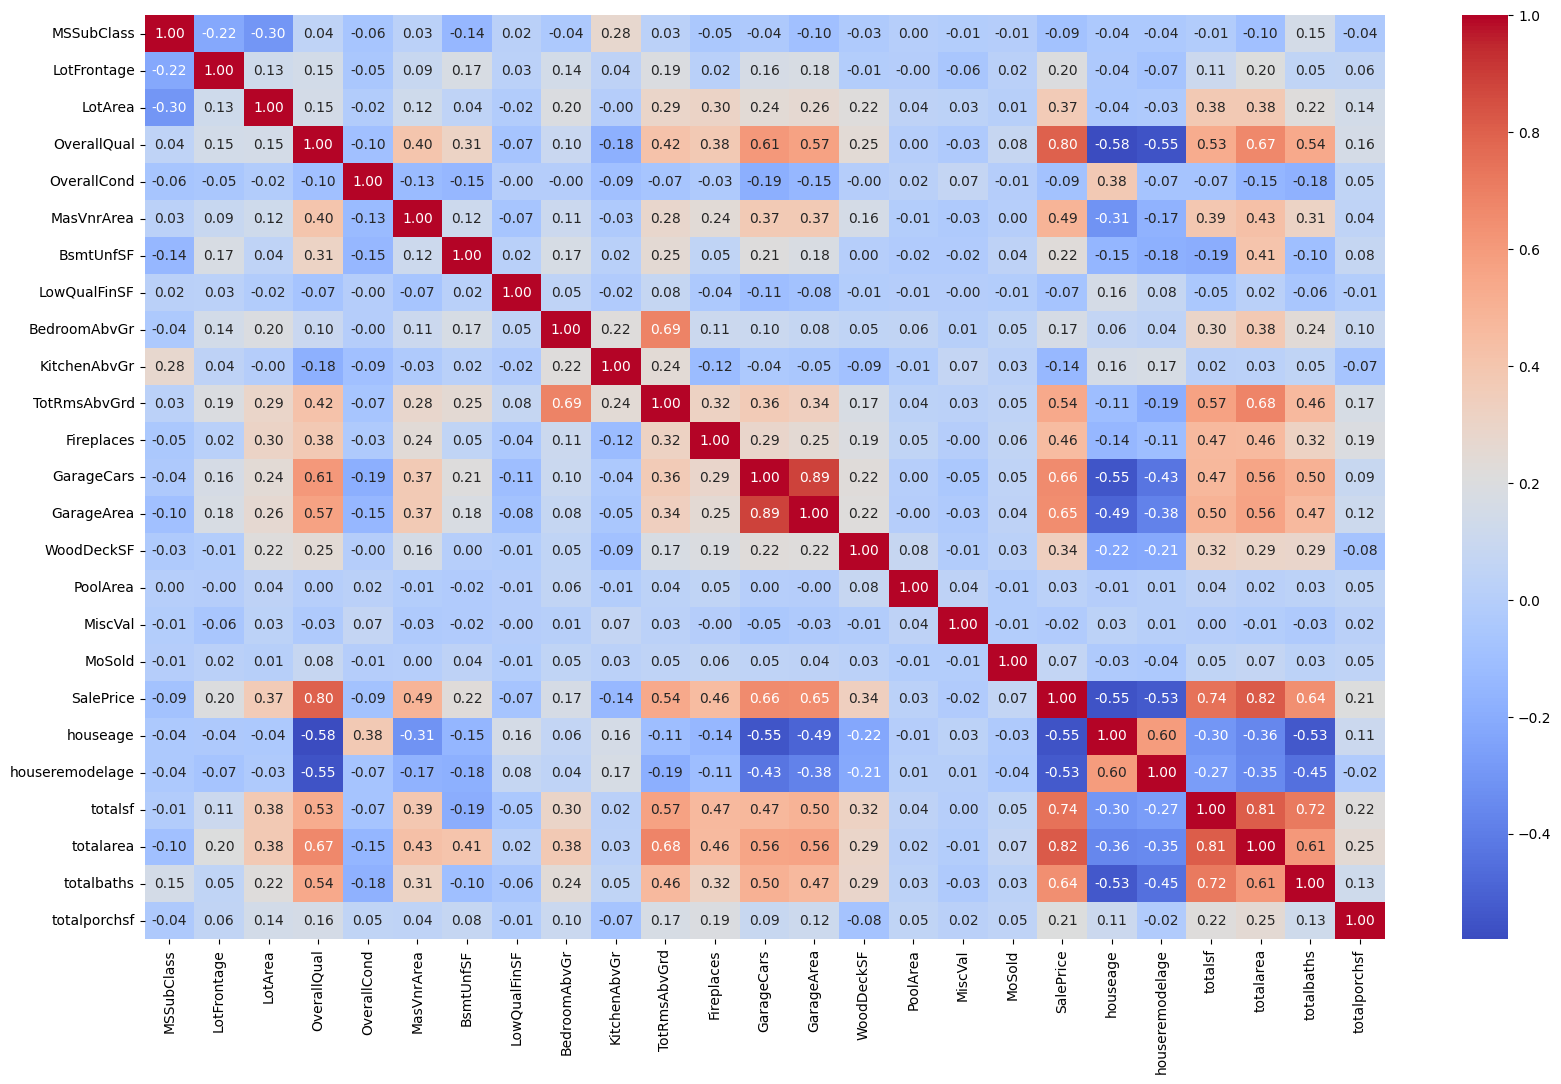

In [241]:
correlation_matrix = train.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt= '.2f')

In [242]:
# we can drop garage area or garage cars
train= train.drop(columns=['GarageArea'])


In [378]:
test= test.drop(columns=['GarageArea'])

C:\Users\akank\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

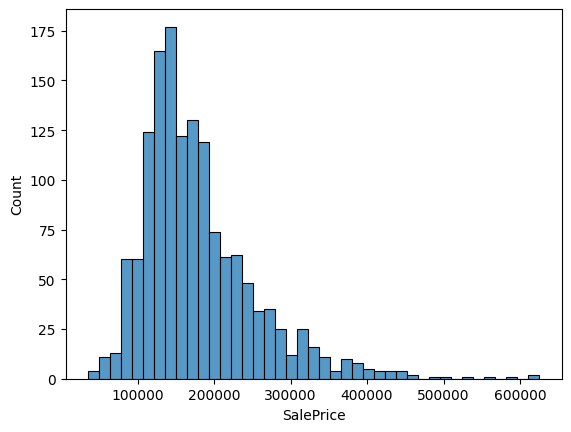

In [243]:
sns.histplot(
            train,
            x=train['SalePrice']
            )

In [244]:
train['SalePrice'] = np.log1p(train['SalePrice'])

C:\Users\akank\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

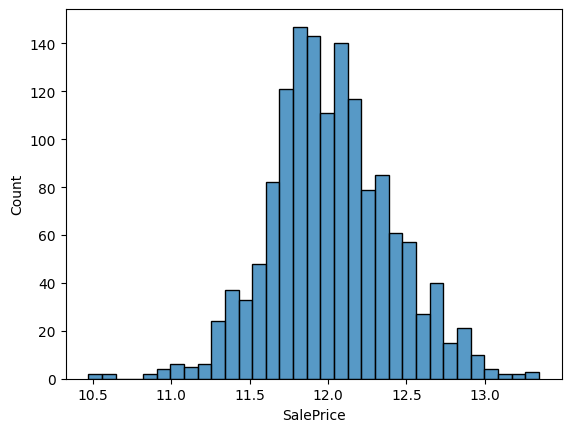

In [245]:
sns.histplot(
            train,
            x=train['SalePrice']
            )

### Encoding

In [246]:
train.dtypes[train.dtypes=='object']

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [273]:
ode_cols = ['LotShape', 'LandContour', 'Utilities', 'LandSlope', 'BsmtQual', 'BsmtFinType1', 'CentralAir', 'Functional',
           'FireplaceQu','GarageFinish','GarageQual','PavedDrive', 'ExterCond',  'KitchenQual','BsmtExposure',
           'HeatingQC','ExterQual','BsmtCond']

In [279]:
ohe_cols=['Street', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'MasVnrType', 'Foundation',
          'HouseStyle','RoofStyle','Exterior1st','Exterior2nd',
          'Electrical', 'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']

In [250]:
num_cols = train.select_dtypes(include=['int64','float64']).columns
num_cols = num_cols.drop('SalePrice')

In [251]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [274]:
ode_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1))  
])

In [280]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore',sparse_output=False))  
])

In [281]:
col_trans = ColumnTransformer(transformers=[
    ('num_p',num_pipeline, num_cols),
    ('ode_p',ode_pipeline,ode_cols),
    ('ohe_p',ohe_pipeline,ohe_cols) 
],
     remainder= 'passthrough',
    n_jobs = -1
                             )

In [282]:
pipeline = Pipeline(steps=[
    ('preprocessing', col_trans)
])

In [285]:
X = train.drop('SalePrice',axis=1)
y = train['SalePrice']

In [284]:
x_preprocess = pipeline.fit_transform(X)

In [379]:
X_train , X_test , y_train, y_test = train_test_split(x_preprocess, y, test_size=0.2, random_state=25)

### Modelling 

In [287]:
lr = LinearRegression()

In [288]:
lr.fit(X_train, y_train)

LinearRegression()

In [290]:
y_pred_lr = lr.predict(X_test)

In [291]:
mean_squared_error(y_test,y_pred_lr) 

7.763150028816277e+16

In [ ]:
# Random Forest Regressor

In [301]:
RFR = RandomForestRegressor(random_state=13)

In [311]:
param_grid_rfr = {
    'max_depth': [5,10,15],
    'n_estimators': [100,250,500],
    'min_samples_split': [3,5,10]
}

In [312]:
rfr_cv = GridSearchCV(RFR, param_grid_rfr, cv = 5 , scoring='neg_mean_squared_error', n_jobs=-1)

In [313]:
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=13), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 250, 500]},
             scoring='neg_mean_squared_error')

In [314]:
np.sqrt(-1 * rfr_cv.best_score_)

0.13202625844789398

In [ ]:
# XGB Regressor

In [315]:
XGB = XGBRegressor(randon_state=13)

In [316]:
param_grid_xgb = {
    'learning_rate' : [0.05, 0.1, 0.2],
    'n_estimators' : [300],
    'max_depth': [3],
    'min_child_weight': [1,2,3],
    'gamma': [0,0.1,0.2],
    'subsample': [.8,.9,1.0],
    'col_sample_bytree': [0.8,0.9,1.0]
}

In [317]:
xgb_cv = GridSearchCV(XGB, param_grid_xgb, cv = 3 , scoring='neg_mean_squared_error', n_jobs=-1)

In [318]:
xgb_cv.fit(X_train, y_train)

C:\Users\akank\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [12:17:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "col_sample_bytree", "randon_state" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'col_sample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3],
                         'min_child_weight': [1, 2, 3], 'n_estimators': [300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [319]:
np.sqrt(-1*xgb_cv.best_score_)

0.11945344351241328

In [ ]:
# Ridge

In [320]:
ridge = Ridge()

In [321]:
param_grid_ridge = {
    'alpha' : [0.05, 0.1, 1, 3, 5, 10],
    'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
}

In [322]:
ridge_cv = GridSearchCV(ridge, param_grid_ridge, cv = 5 , scoring='neg_mean_squared_error', n_jobs=-1)

In [323]:
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.05, 0.1, 1, 3, 5, 10],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag']},
             scoring='neg_mean_squared_error')

In [324]:
np.sqrt(-1*ridge_cv.best_score_)

0.11105376330855171

In [ ]:
# GradientBoostingAggressor

In [328]:
GBR = GradientBoostingRegressor()

In [330]:
param_grid_gbr = {
    'max_depth': [12,15,20],
    'n_estimators': [200,300,1000],
    'min_samples_split': [10,25,50],
    'learning_rate' : [0.001, 0.01, 0.1],
    'max_features': [0.01, 0.1,0.7]
}

In [331]:
GBR_cv = GridSearchCV(GBR, param_grid_gbr, cv = 5 , scoring='neg_mean_squared_error', n_jobs=-1)

In [332]:
GBR_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [12, 15, 20],
                         'max_features': [0.01, 0.1, 0.7],
                         'min_samples_split': [10, 25, 50],
                         'n_estimators': [200, 300, 1000]},
             scoring='neg_mean_squared_error')

In [333]:
np.sqrt(-1*GBR_cv.best_score_)

0.11222741324658052

In [334]:
lgbm_regressor = lgb.LGBMRegressor()

In [335]:
param_grid_lgbm = {
    'boosting_type': ['gbdt','dart'],
    'num_leaves': [20,30,40],
    'learning_rate' : [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

In [336]:
lgbm_cv = GridSearchCV(lgbm_regressor, param_grid_lgbm, cv = 3 , scoring='neg_mean_squared_error', n_jobs=-1)

In [337]:
lgbm_cv.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001986 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2024
[LightGBM] [Info] Number of data points in the train set: 1148, number of used features: 117
[LightGBM] [Info] Start training from score 12.020202


GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [20, 30, 40]},
             scoring='neg_mean_squared_error')

In [338]:
np.sqrt(-1*lgbm_cv.best_score_)

0.12518563928807175

In [ ]:
# Cat Regressor

In [343]:
catboost = CatBoostRegressor(loss_function='RMSE',verbose=False)

In [344]:
param_grid_cat = {
    'iterations': [100,500,1000],
    'depth' : [4, 6, 8, 10],
    'learning_rate': [0.01,0.05,.1,.5]
}

In [345]:
cat_cv = GridSearchCV(catboost, param_grid_cat, cv = 3 , scoring='neg_mean_squared_error', n_jobs=-1)

In [346]:
cat_cv.fit(X_train, y_train)

C:\Users\akank\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
7 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akank\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akank\anaconda3\Lib\site-packages\catboost\core.py", line 5827, in fit
    return self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline,
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000025089F8D690>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8, 10], 'iterations': [100, 500, 1000],
                         'learning_rate': [0.01, 0.05, 0.1, 0.5]},
             scoring='neg_mean_squared_error')

In [347]:
np.sqrt(-1*cat_cv.best_score_)

0.11434176193000138

In [ ]:
# Voting Regressor

In [339]:
vr = VotingRegressor([('gbr',GBR_cv.best_estimator_),
                     ('xgb',xgb_cv.best_estimator_),
                     ('ridge',ridge_cv.best_estimator_)],
                    weights=[2,3,1])

In [340]:
vr.fit(X_train, y_train)

C:\Users\akank\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:58:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "col_sample_bytree", "randon_state" } are not used.

  warnings.warn(smsg, UserWarning)


VotingRegressor(estimators=[('gbr',
                             GradientBoostingRegressor(learning_rate=0.01,
                                                       max_depth=12,
                                                       max_features=0.1,
                                                       min_samples_split=50,
                                                       n_estimators=1000)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None, col_sample_bytree=0.8,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_...
                                          interaction_constraints=None,
                                          learning_rate=0.05, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=3,
                                          max_leaves=None, min_child_weight=3,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=300,
                                          n_jobs=None, num_parallel_tree=None, ...)),
                            ('ridge', Ridge(alpha=10, solver='sparse_cg'))],
                weights=[2, 3, 1])

In [341]:
y_pred_vr = vr.predict(X_test)

In [342]:
mean_squared_error(y_test,y_pred_vr,squared=False)

0.1269103372893024

In [ ]:
# stacked Regressor

In [348]:
estimators = [('gbr',GBR_cv.best_estimator_),
                     ('xgb',xgb_cv.best_estimator_),
              ('cat',cat_cv.best_estimator_),
              ('lgbm',lgbm_cv.best_estimator_),
                     ('rfr',rfr_cv.best_estimator_)]

In [349]:
stackreg = StackingRegressor(
                            estimators = estimators,
                            final_estimator = vr
                            )

In [350]:
stackreg.fit(X_train, y_train)

C:\Users\akank\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [00:53:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "col_sample_bytree", "randon_state" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000867 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2024
[LightGBM] [Info] Number of data points in the train set: 1148, number of used features: 117
[LightGBM] [Info] Start training from score 12.020202


C:\Users\akank\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [00:54:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "col_sample_bytree", "randon_state" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\akank\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [00:54:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "col_sample_bytree", "randon_state" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000583 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1902
[LightGBM] [Info] Number of data points in the train set: 918, number of used features: 105
[LightGBM] [Info] Start training from score 12.010582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1905
[LightGBM] [Info] Number of data points in the train set: 918, number of used features: 109
[LightGBM] [Info] Start training from score 12.016754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

C:\Users\akank\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [00:56:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "col_sample_bytree", "randon_state" } are not used.

  warnings.warn(smsg, UserWarning)


StackingRegressor(estimators=[('gbr',
                               GradientBoostingRegressor(learning_rate=0.01,
                                                         max_depth=12,
                                                         max_features=0.1,
                                                         min_samples_split=50,
                                                         n_estimators=1000)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            col_sample_bytree=0.8,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enabl...
                                                                            interaction_constraints=None,
                                                                            learning_rate=0.05,
                                                                            max_bin=None,
                                                                            max_cat_threshold=None,
                                                                            max_cat_to_onehot=None,
                                                                            max_delta_step=None,
                                                                            max_depth=3,
                                                                            max_leaves=None,
                                                                            min_child_weight=3,
                                                                            missing=nan,
                                                                            monotone_constraints=None,
                                                                            multi_strategy=None,
                                                                            n_estimators=300,
                                                                            n_jobs=None,
                                                                            num_parallel_tree=None, ...)),
                                                              ('ridge',
                                                               Ridge(alpha=10,
                                                                     solver='sparse_cg'))],
                                                  weights=[2, 3, 1]))

In [352]:
y_pred_stack = stackreg.predict(X_test)

In [354]:
mean_squared_error(y_test,y_pred_stack, squared = False) 

0.13113668097144657

In [380]:
df_test_preprocess = pipeline.transform(test)

In [383]:
y_stacking = np.exp(stackreg.predict(df_test_preprocess))

In [385]:
df_y_stacking_out = test[['Id']]

In [386]:
df_y_stacking_out['SalePrice'] = y_stacking

C:\Users\akank\AppData\Local\Temp\ipykernel_20364\3544444011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y_stacking_out['SalePrice'] = y_stacking


In [388]:
df_y_stacking_out.to_csv('HousePrediction.csv',index=False)